In [44]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

# Or try the preview build (unstable)
!pip install tf-nightly


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\이현식\\AppData\\Local\\Temp\\pip-uninstall-cx7z1j4p\\pip.exe'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
     -------------------------------------- 361.4/361.4 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 18.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 17.9 MB/s eta 0:00:00
     ------------------------------------- 438.9/438.9 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\pythontemp\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



In [61]:
!pip install keras

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [3]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankel boot'
]

TypeError: only integer scalar arrays can be converted to a scalar index

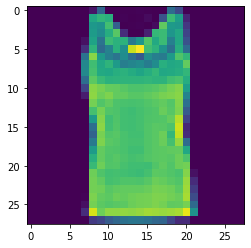

In [5]:
 # 학습 데이터셋 중에서 하나의 이미지 보여주기
 img_index = 1005

 plt.imshow(x_train[img_index])
 print(class_name[y_train[img_index]])

In [ ]:
print(x_train[0])

In [6]:
# 데이터 정규화 ( 0~1 값 갖도록 )

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [9]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
model = keras.Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten()) # Flatten()은 이미지를 일차원으로 바꿔줍니다.
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
hist = model.fit(
                x = x_train,
                 y = y_train,
                 batch_size=64,
                 epochs=10
                 )

Epoch 1/10
938/938 [==============================] - 94s 98ms/step - loss: 0.5535 - accuracy: 0.8000
Epoch 2/10
938/938 [==============================] - 73s 78ms/step - loss: 0.3960 - accuracy: 0.8562
Epoch 3/10
938/938 [==============================] - 57s 61ms/step - loss: 0.3627 - accuracy: 0.8683
Epoch 4/10
938/938 [==============================] - 57s 61ms/step - loss: 0.3419 - accuracy: 0.8744
Epoch 5/10
938/938 [==============================] - 58s 62ms/step - loss: 0.3295 - accuracy: 0.8803
Epoch 6/10
938/938 [==============================] - 57s 61ms/step - loss: 0.3183 - accuracy: 0.8834
Epoch 7/10
938/938 [==============================] - 57s 61ms/step - loss: 0.3122 - accuracy: 0.8868
Epoch 8/10
938/938 [==============================] - 58s 61ms/step - loss: 0.3039 - accuracy: 0.8884
Epoch 9/10
938/938 [==============================] - 58s 62ms/step - loss: 0.2966 - accuracy: 0.8905
Epoch 10/10
938/938 [==============================] - 57s 61ms/step - loss: 0.289

In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

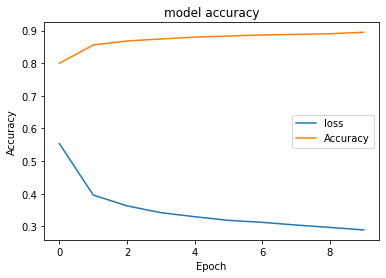

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss", "Accuracy"])
plt.show()

In [25]:
# 테스트 셋으로 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9024999737739563


In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

prob_pred = model.predict(x_test)
prob_label = prob_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', prob_label,fmt='%d')